In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [43]:
df = pd.read_csv('stud.csv')

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
df.shape

(1000, 8)

In [46]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [50]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [51]:
print("Categories in 'gender' variable: ",end=" " )
print(df["gender"].unique())
print("Categories in 'race_ethnicity' variable: ",end=" " )
print(df["race_ethnicity"].unique())
print("Categories in 'parental level of education' variable: ",end=" " )
print(df["parental_level_of_education"].unique())
print("Categories in 'lunch' variable: ",end=" " )
print(df["lunch"].unique())
print("Categories in 'test preparation courses' variable: ",end=" " )
print(df["test_preparation_course"].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation courses' variable:  ['none' 'completed']


In [52]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical feature : {}'.format(len(numeric_features), numeric_features))
print('We have {} numerical feature : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 numerical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [53]:
df['total score'] = df['math_score'] +df['reading_score'] + df['writing_score']
df['average score'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [54]:
reading_full = df[df['reading_score'] ==100]['average score'].count()
writing_full  = df[df['writing_score']==100]['average score'].count()
math_full  = df[df['math_score']==100]['average score'].count()

print(f'Number of student with less full marks in Maths: {math_full}')
print(f'Number of student with less full marks in Writing: {writing_full}')
print(f'Number of student with less full marks in Reading: {reading_full}')

Number of student with less full marks in Maths: 7
Number of student with less full marks in Writing: 14
Number of student with less full marks in Reading: 17


In [55]:
reading_less_20 = df[df['reading_score']  <=20]['average score'].count()
writing_less_20  = df[df['writing_score'] <=20]['average score'].count()
math_less_20  = df[df['math_score'] <=20]['average score'].count()

print(f'Number of student with less than 20 marks in Maths: {math_less_20}')
print(f'Number of student with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of student with less than 20 marks in Reading: {reading_less_20}') 

Number of student with less than 20 marks in Maths: 4
Number of student with less than 20 marks in Writing: 3
Number of student with less than 20 marks in Reading: 1


## Data Visualization

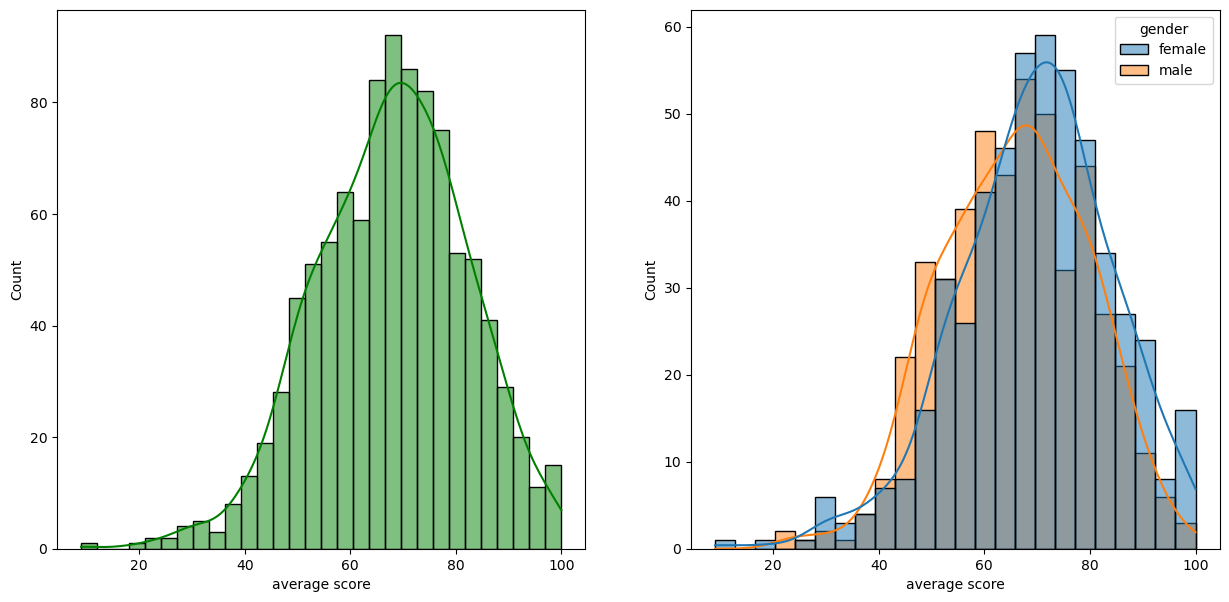

In [58]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score',bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score',kde=True,hue='gender')
plt.show()

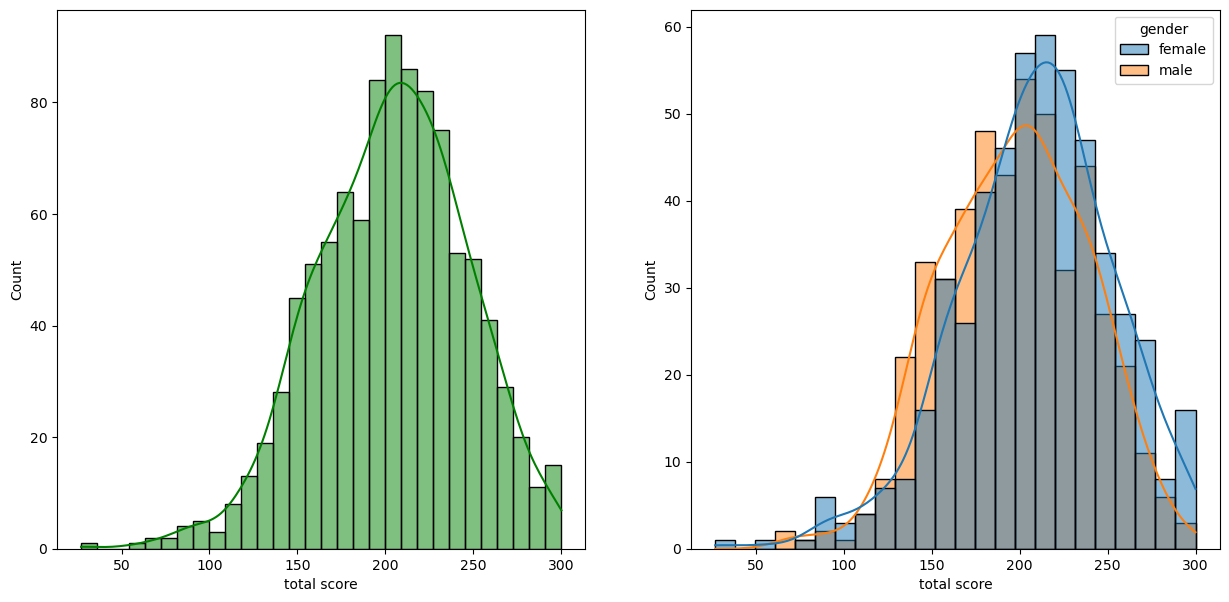

In [60]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score',bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='gender')
plt.show()

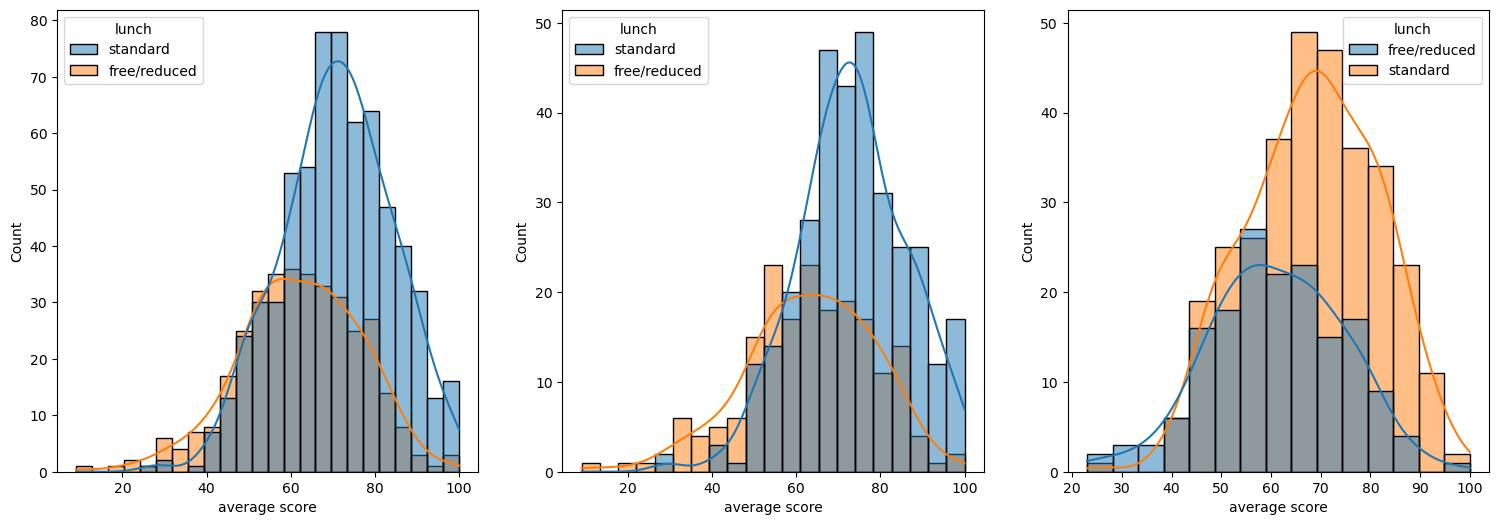

In [64]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score', kde=True,hue='lunch')
plt.show()

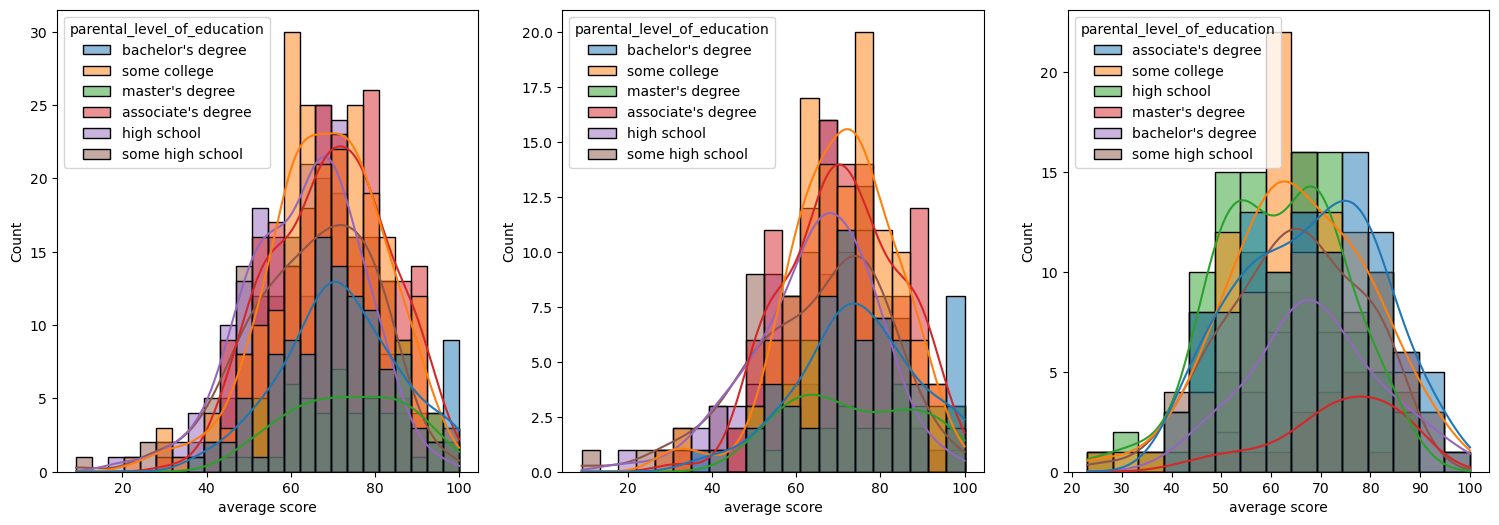

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score', kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score', kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score', kde=True,hue='parental_level_of_education')
plt.show()

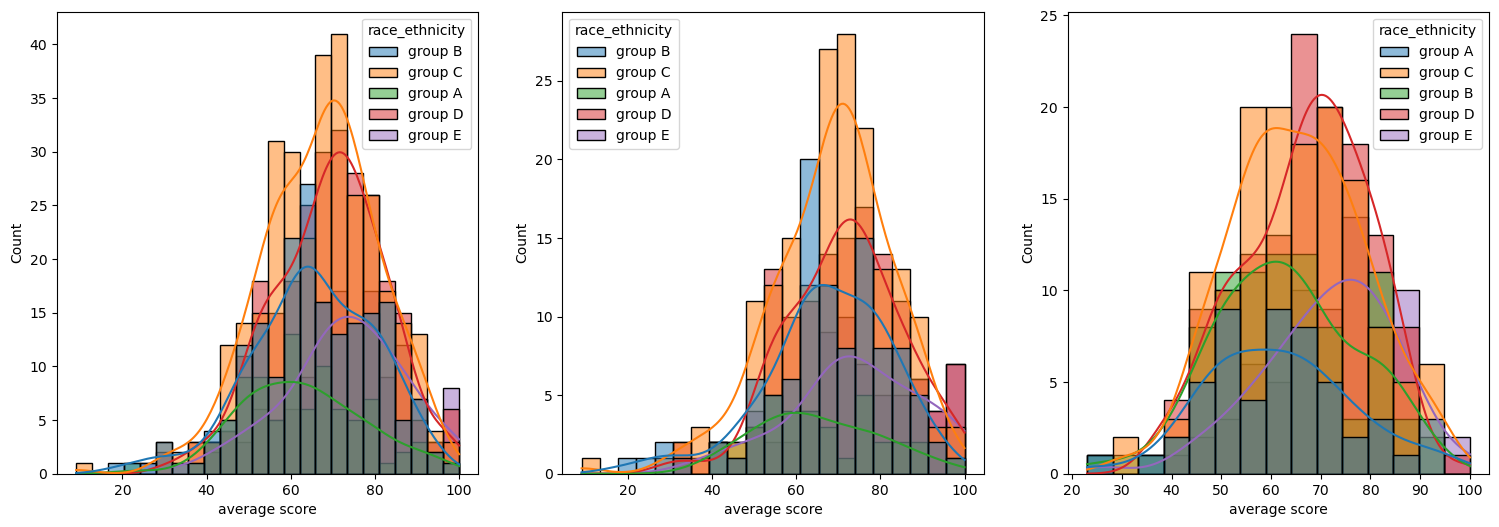

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score', kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score', kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score', kde=True,hue='race_ethnicity')
plt.show()

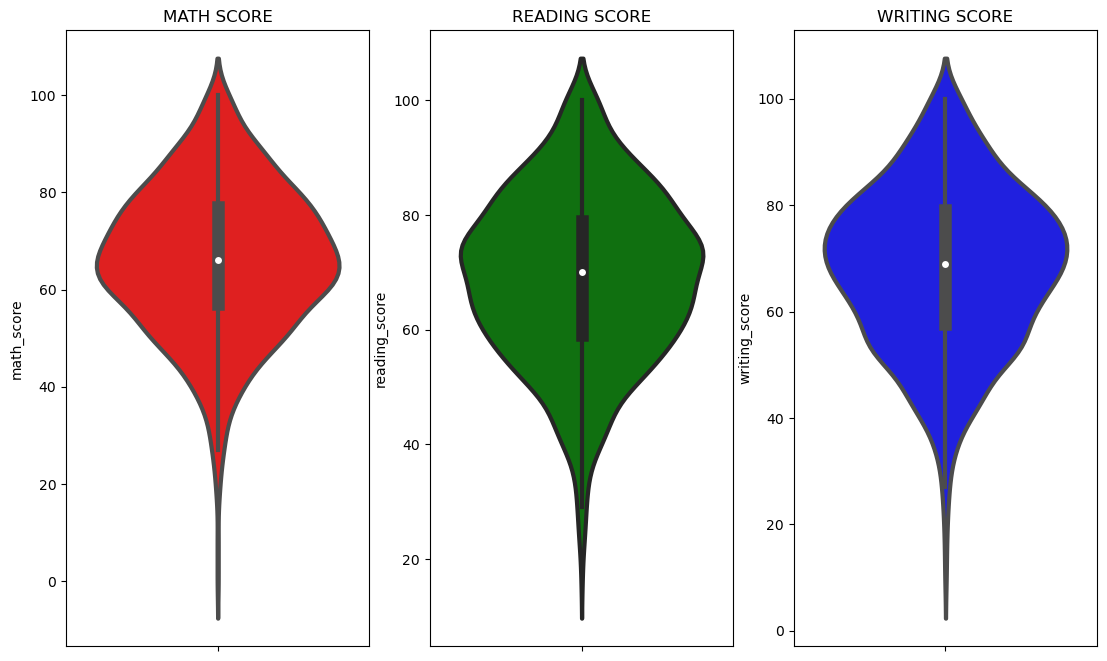

In [70]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Multivariate analysis using pieplot

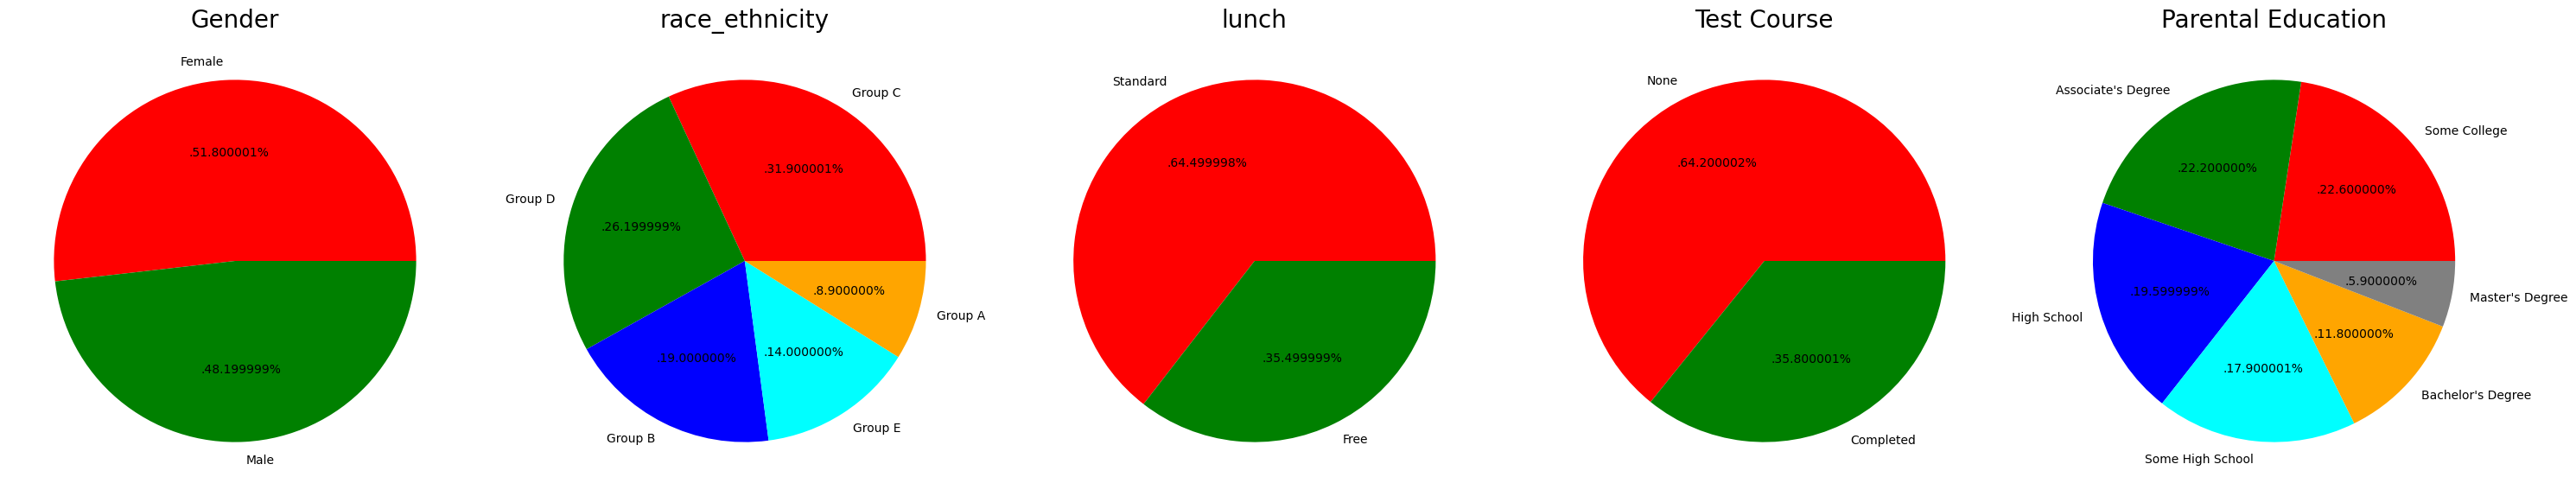

In [79]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1 , 5 , 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels= labels, autopct = '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1 , 5 , 2)
size = df['race_ethnicity'].value_counts()
labels =  'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green','blue','cyan','orange']

plt.pie(size, colors = color, labels= labels, autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1 , 5 , 3)
size = df['lunch'].value_counts()
labels =  'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels= labels, autopct = '.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

### Faeture Wise Visualization

#### GENDER COLUMN
#####  UNIVARIATE ANALYSIS( How is distribution of Gender ? )

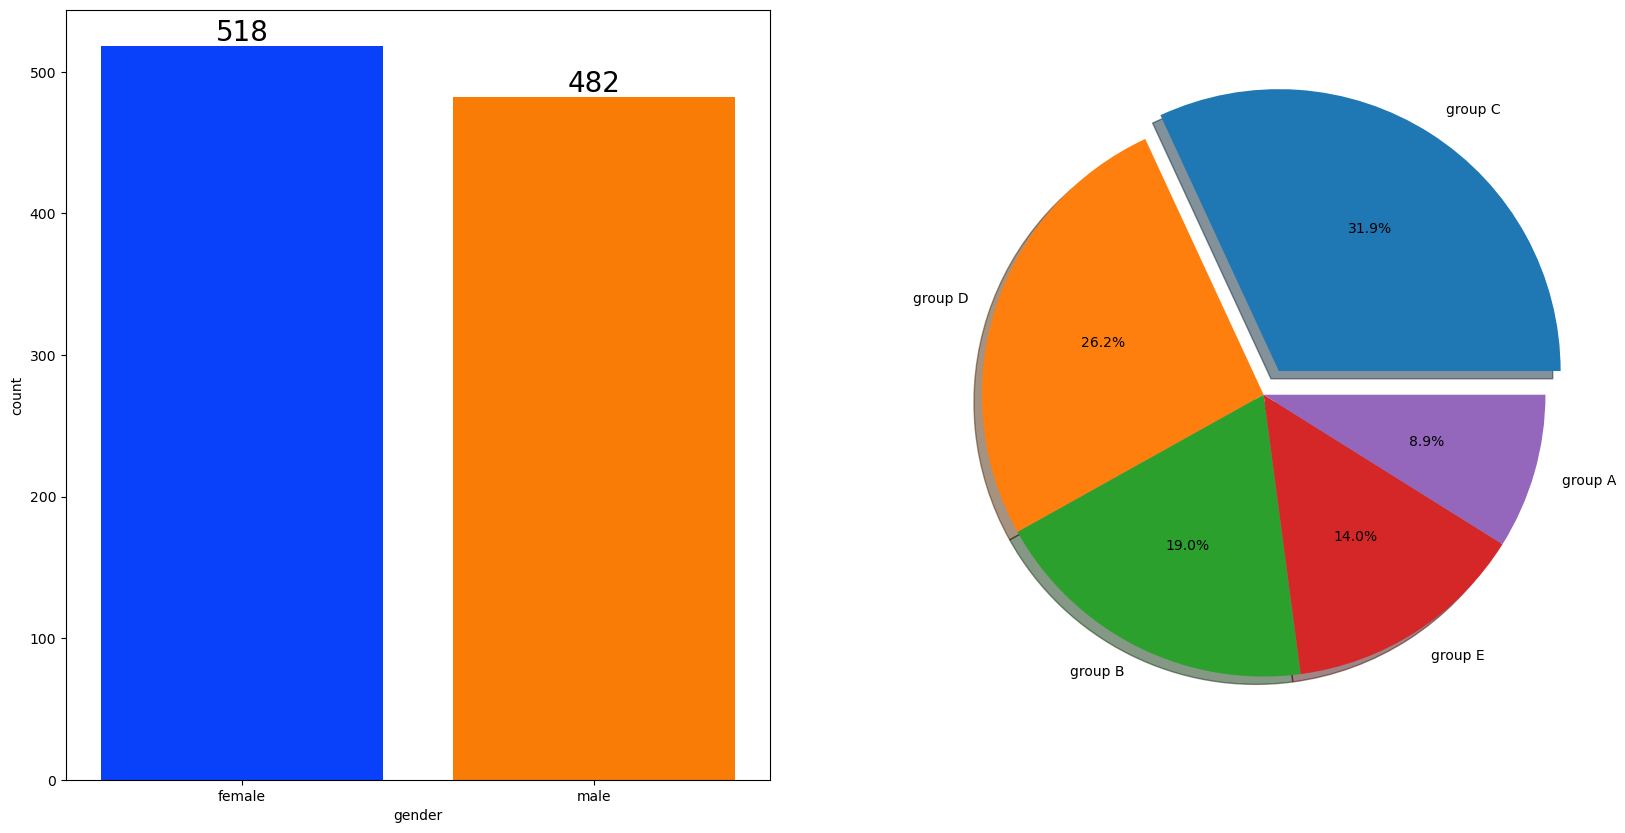

In [109]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data = df, palette = 'bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [85]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


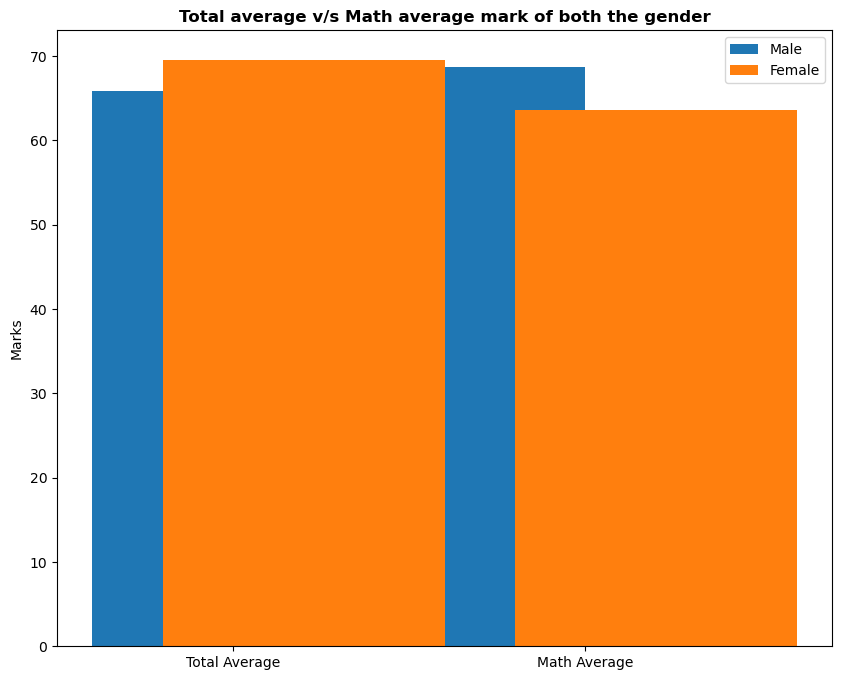

In [95]:
plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average mark of both the gender", fontweight='bold')
plt.legend()
plt.show()

#### Race_ethnicity column

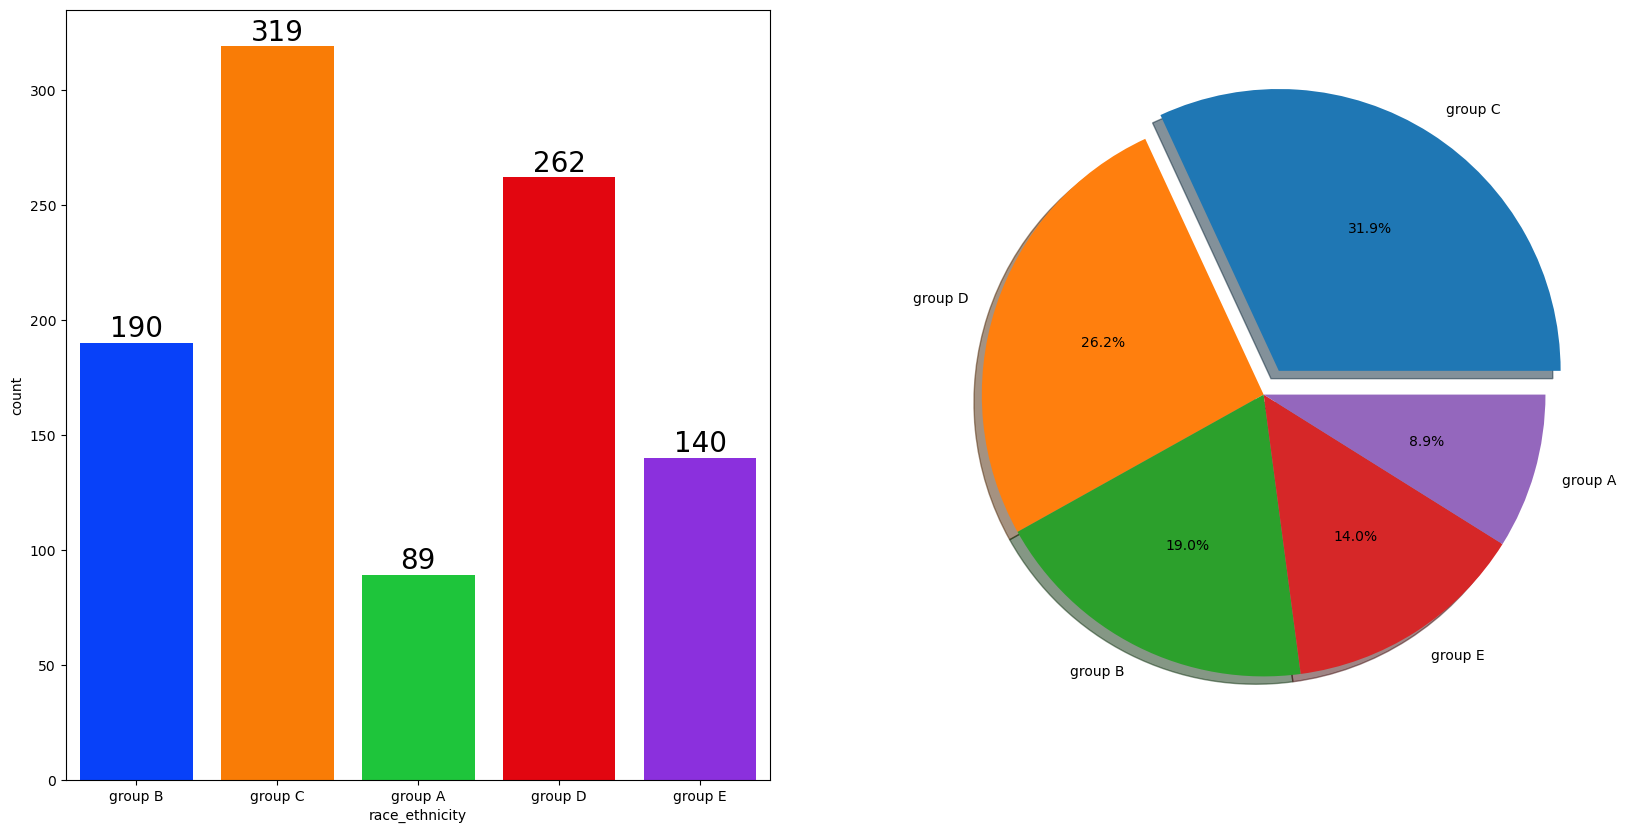

In [101]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax = ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

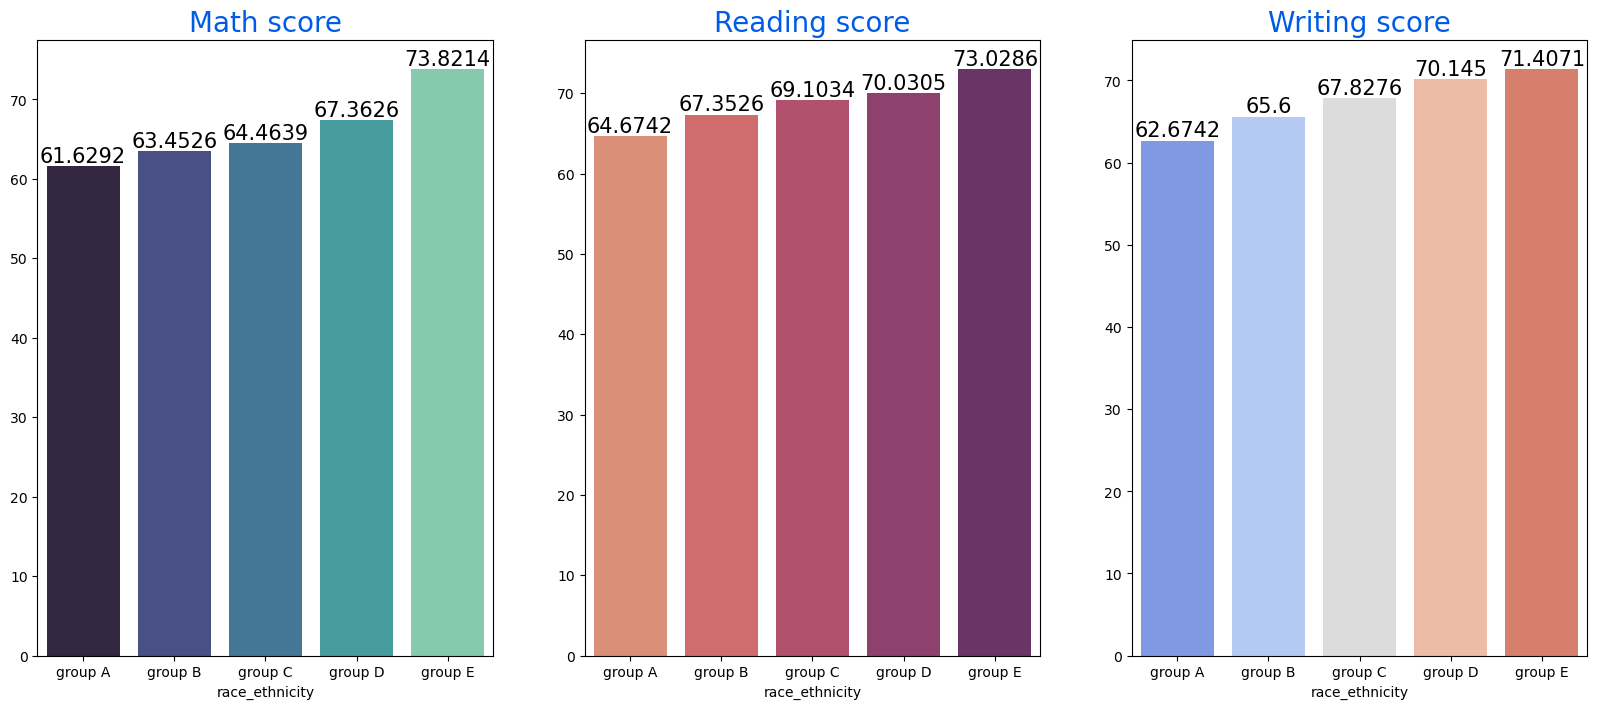

In [114]:
Group_data2= df.groupby('race_ethnicity')
f,ax= plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### PARENTAL LEVEL OF EDUCATION COLUMN

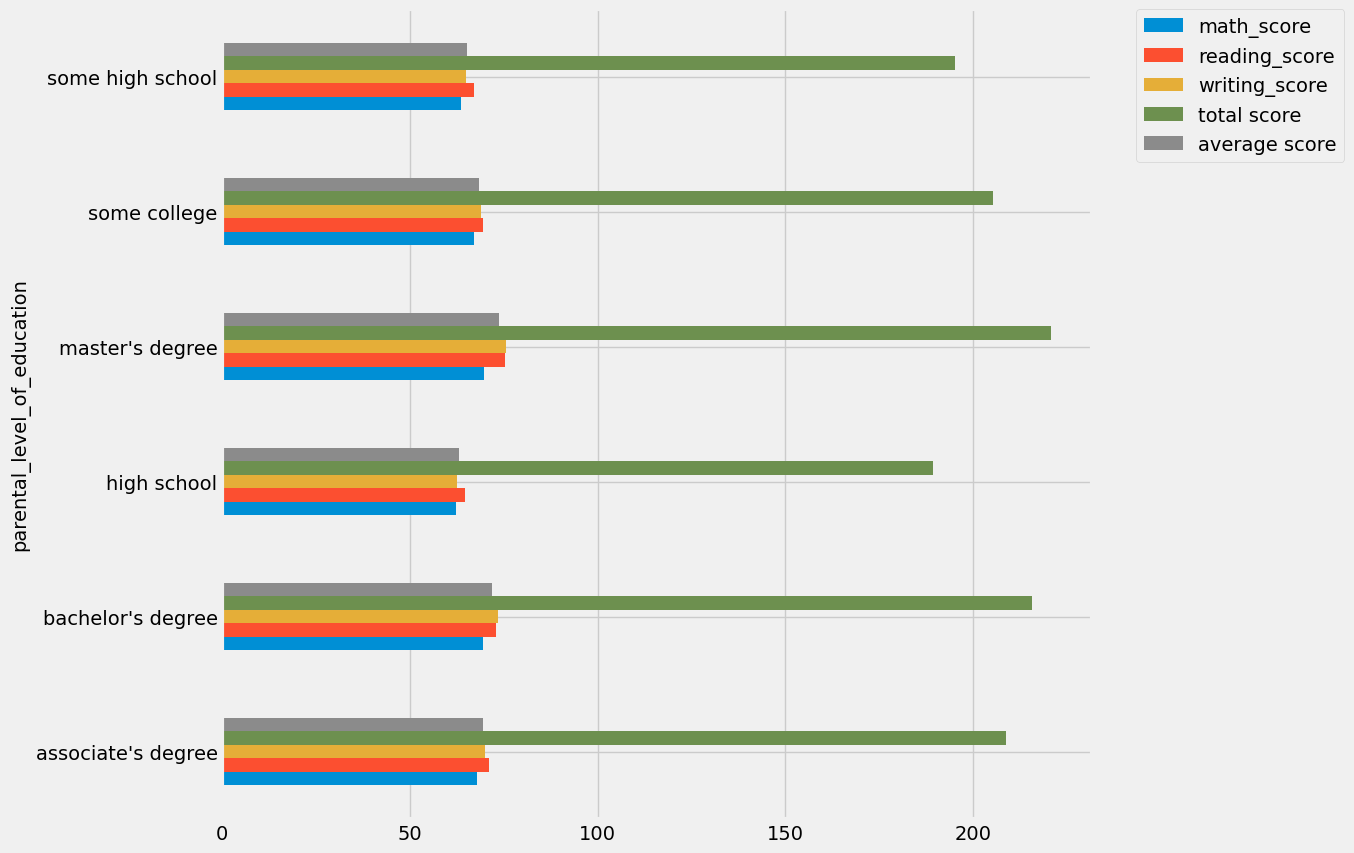

In [119]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Lunch column

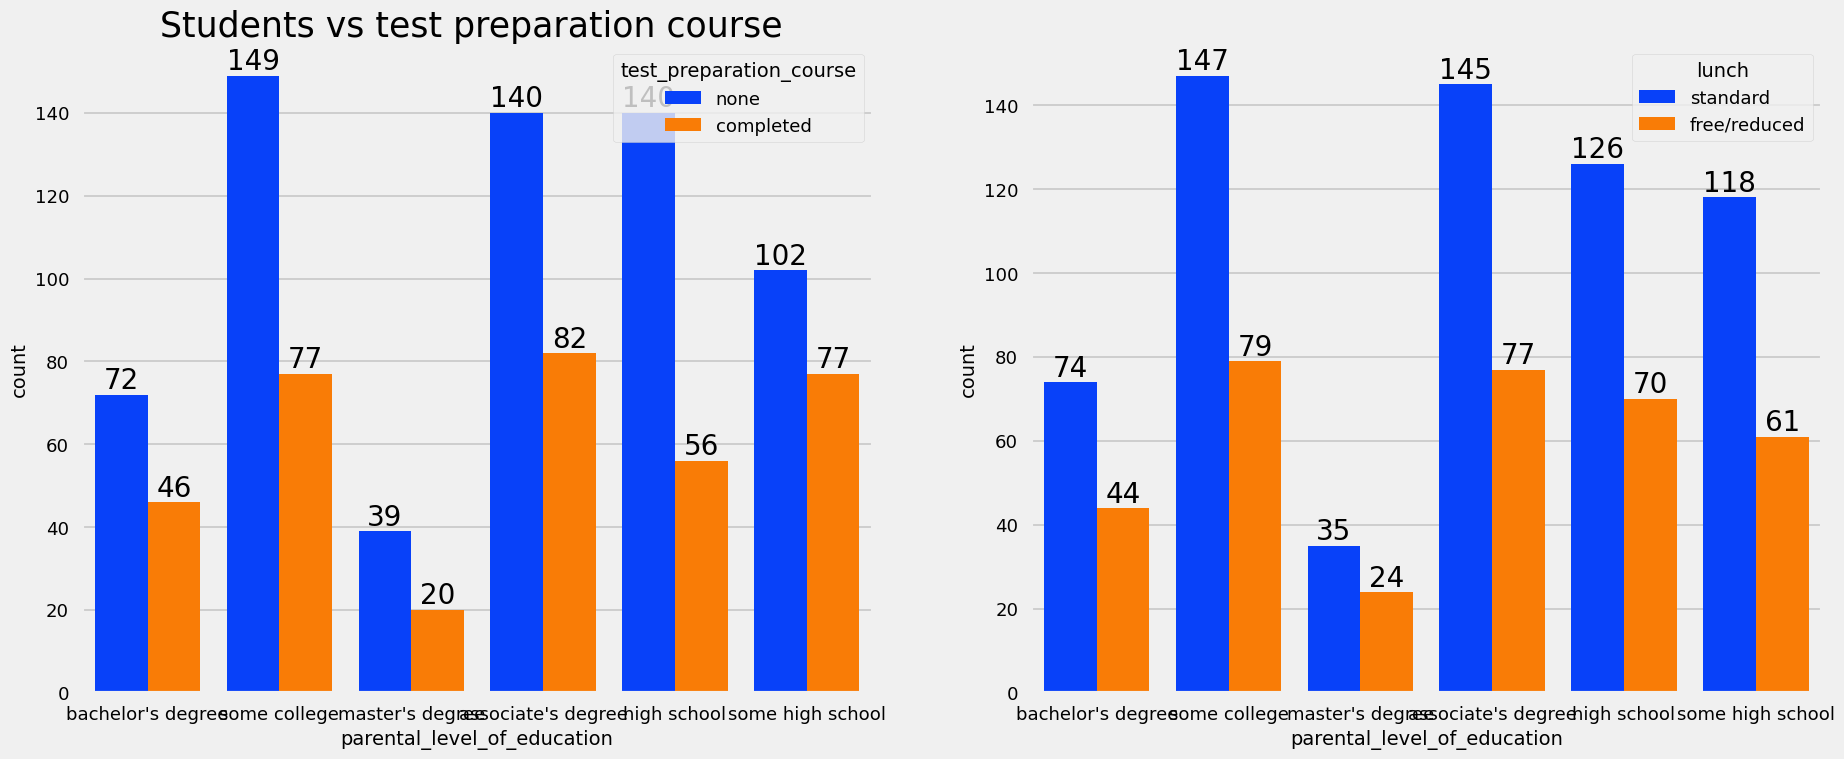

In [122]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

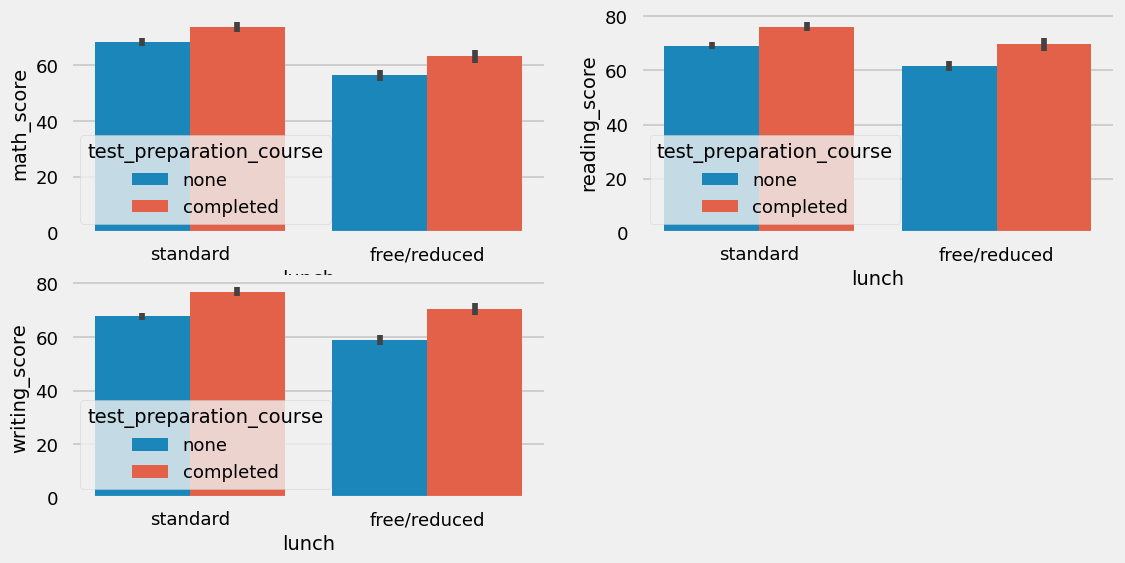

In [129]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Checking Outlier

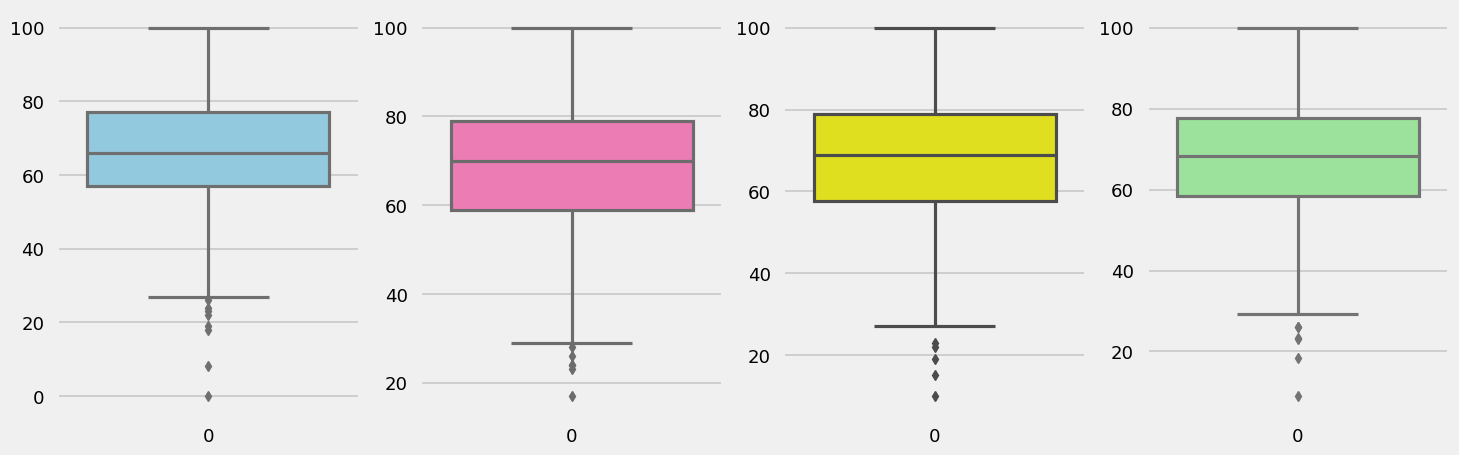

In [130]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

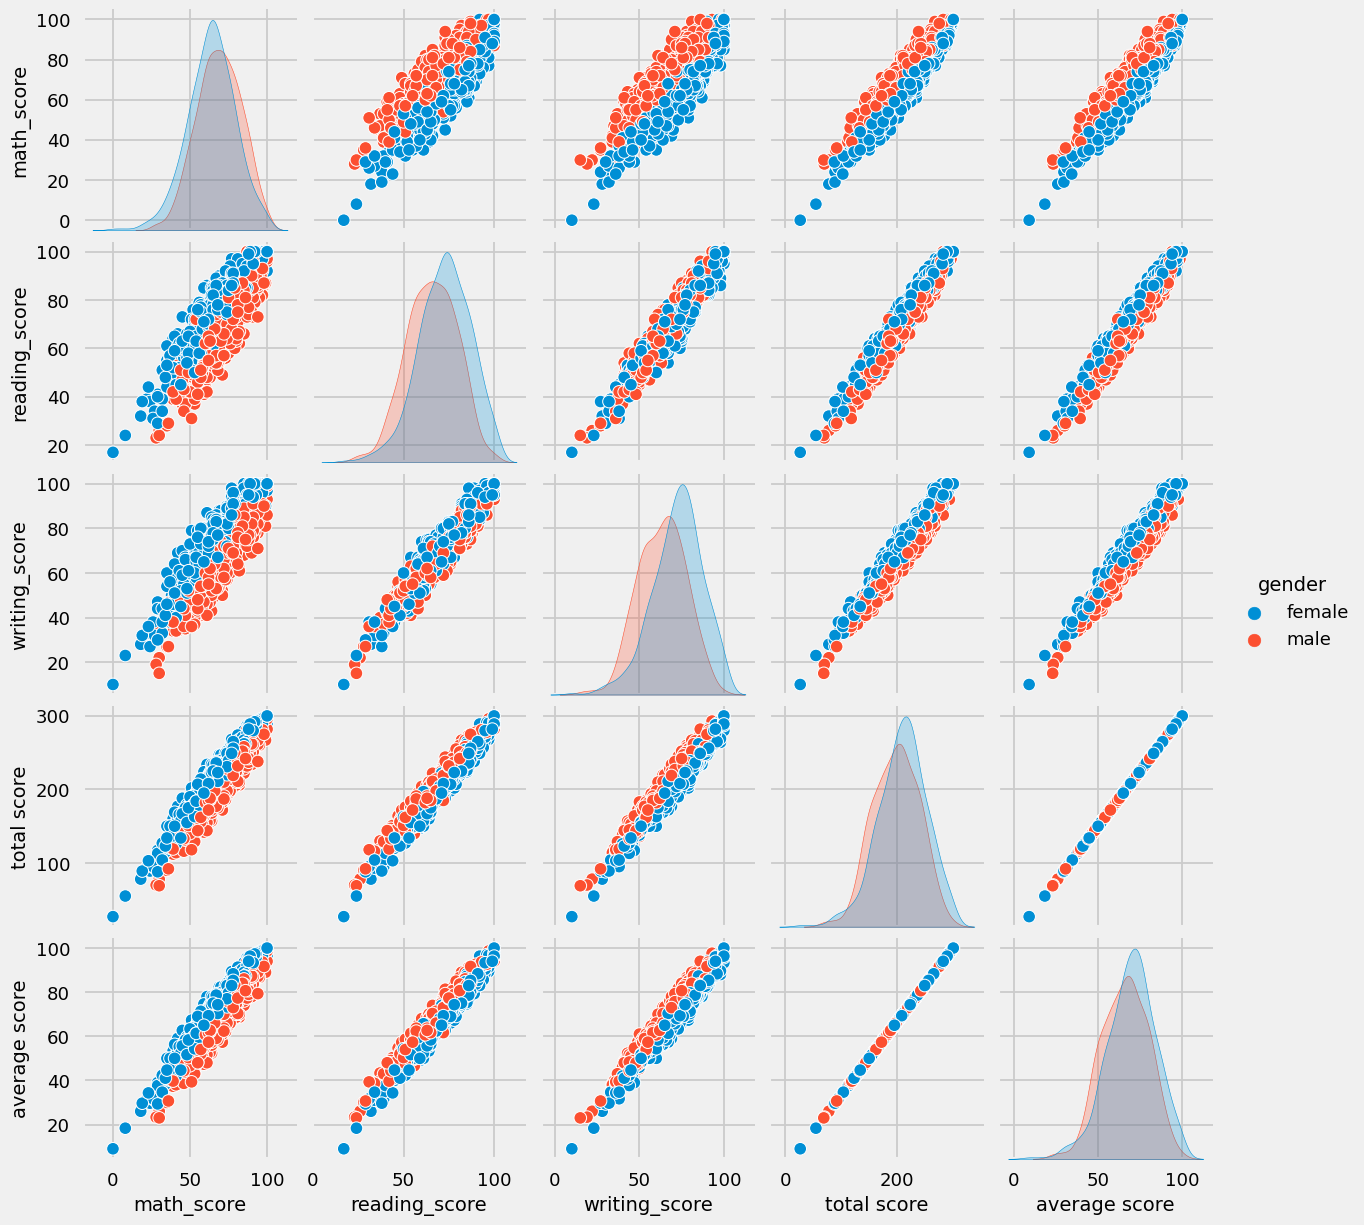

In [131]:
sns.pairplot(df,hue = 'gender')
plt.show()